In [1]:
import badlandsBbox as model

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Badlands optimisation Phase 1

Our goal is to start investigating how we can use a machine learning approach to infer some of the forcing conditions for our landscape evolution model _badlands_.

In this phase 1, we assume that the initial surface (paleo-topography), the final one and the amount of erosion/deposition at the end of the simulation are all known. 

In real cases, the final topography is known and we often have information regarding the erosion/deposition in specific regions of the landscape. However the paleo-topography is generally loosely constrained and we will need to relax the number of known parameters later.

The landscape in this simulation will only evolve according to 2 parameters:
+ the amount of precipitation (that is assumed uniform and constant over the region)
+ the sediment erodibility value (that is also assumed uniform and constant over the region)

## Generation of the target model

We first start by creating a _badlands_ model that will be the target that the machine learning algorithm (MLA) will need to match.

To do that we specify the rain (precipitation) and erodibility values:
+ rain is set to 1 m/a
+ erodibility is set to 9.e-5

These 2 values are the ones that we want the MLA to find...

In [2]:
!rm -rf output
targetZ,targetED = model.blackbox(inputname='crater.xml',rain=1,erodibility=7.e-5,etime=150000)

   - Writing outputs (0.13 seconds; tNow = 0.0)
tNow = 38200.0 (step took 0.01 seconds)
   - Writing outputs (0.08 seconds; tNow = 50000.0)
tNow = 87100.0 (step took 0.01 seconds)
   - Writing outputs (0.07 seconds; tNow = 100000.0)
tNow = 135600.0 (step took 0.01 seconds)
tNow = 150000.0 (0.01 seconds)
   - Writing outputs (0.07 seconds; tNow = 150000.0)
Badlands black box model took (s): 21.071011


Let's have a look at the target model outputs

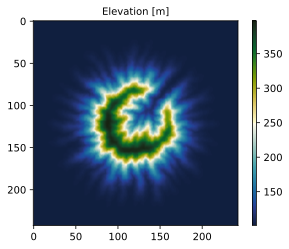

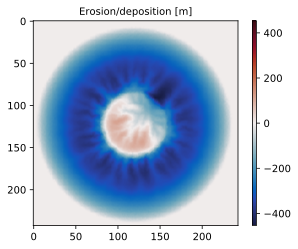

In [3]:
model.plotElev(size=(4,4),elev=targetZ,erodep=targetED)

## Running the Machine Learning algorithm

Now that we have our target model, we assume that the precipitation and erodibility values are unknown. But we define a range of acceptable values such that:
+ the precipitation could be between [0.5,4]
+ the erodibility could be between [1.e-6,1.e-4]

We will then use a MLA to extract possible values to match the targeted dataset:
+ the elevation -- a 2D numpy array: <code>targetZ</code>
+ the cumulative erosion/deposition -- also a 2D numpy array: <code>targetED</code>

The MLA will call badlands black box and compare the results of each result to the target. 
It will look something like:

```python
while(not satisfying):
    
    # Generate possible rain/erodibility values (floating values)
    genRain = ...
    genEro = ...
    
    # Run badlands blackbox
    !rm -rf output
    genZ,genED = model.blackbox(inputname='crater.xml',
                                      rain=genRain,
                                      erodibility=genEro,
                                      etime=150000)
    # Compare generated solutions to targeted solution
    function2compare(genZ,genED,targetZ,targetED)
    # Is the solution acceptable?
```